In [ ]:
!pip install -q mtcnn

     |████████████████████████████████| 2.3 MB 10.1 MB/s 


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import random
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

from PIL import Image
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

from mtcnn.mtcnn import MTCNN


0it [00:00, ?it/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/MyDrive/ID Cards/Alugoju Sathish/'

ROOT_PATH = '/content/drive/MyDrive/ID Cards/'

TRAIN_PATH = '/content/drive/MyDrive/ID Cards/'

VAL_PATH = '/content/drive/MyDrive/ID Cards/'

total images: 3


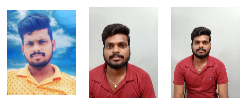

In [ ]:
plt.figure(figsize=(10,5))
i=0
for i, filename in enumerate(os.listdir(PATH)):
    i+=1
    path = PATH + filename
    image = plt.imread(path)
    
    
    plt.subplot(2, 7, i)
    plt.axis('off')
    plt.imshow(image)
    
print('total images:',i)
plt.show()

In [ ]:
# extract a single face from a given photograph
# EXTRACT FACES
def extract_face(filename, required_size=(160, 160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    
    # extract the bounding box from the first face
    try:
        x1, y1, width, height = results[0]['box']
    
        # bug fix
        x1, y1 = abs(x1), abs(y1)

        x2, y2 = x1 + width, y1 + height

        face = pixels[y1:y2, x1:x2]

        image = Image.fromarray(face)

        image = image.resize(required_size)
        face_array = np.asarray(image)

        return face_array
    except Exception as e:
        print(e)
        print(filename)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array



In [ ]:
def load_faces(directory):
    faces = list()
    
    for file_name in tqdm(os.listdir(directory)):
        path = directory + file_name
        
        face = extract_face(path)
        
        faces.append(face)
    return faces

def load_dataset(directory):
    images, labels = list(), list()
    for folder in tqdm(os.listdir(directory)):
        print(folder)
        path = directory+'/'+folder+'/'
        if 'pdf' in path:
          continue

        if not os.path.isdir(path):
            continue

        faces = load_faces(path)
        if faces is None:
            continue

        print(f'EMPLOYEE : {folder}, Faces : {len(faces)}')

        label = [folder for _ in range(len(faces))]

        images.extend(faces)
        labels.extend(label)
        
    return np.asarray(images), np.asarray(labels)

In [ ]:
# TRAIN and TEST DATA
X_train, y_train = load_dataset(TRAIN_PATH)

X_test, y_test = load_dataset(VAL_PATH)

  0%|          | 0/30 [00:00<?, ?it/s]

Sasmita Kumari Guru


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Sasmita Kumari Guru, Faces : 1
Sivakumar C


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : Sivakumar C, Faces : 2
Vijay Arun Mane


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Vijay Arun Mane, Faces : 3
Sunil Badaseth


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : Sunil Badaseth, Faces : 2
Ughade Shital Sanjay


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Ughade Shital Sanjay, Faces : 3
zareena


  0%|          | 0/4 [00:00<?, ?it/s]

Celebrity : zareena, Faces : 4
Sarika Siddharth Dhende


  0%|          | 0/4 [00:00<?, ?it/s]

Celebrity : Sarika Siddharth Dhende, Faces : 4
V Ashok


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : V Ashok, Faces : 2
Venu Gopal .P


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Venu Gopal .P, Faces : 3
Uday Gurav


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Uday Gurav, Faces : 1
Meghana .K


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Meghana .K, Faces : 1
Rajendra Beja


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Rajendra Beja, Faces : 3
Nitin salokhe


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Nitin salokhe, Faces : 1
S Ashwin Kumar


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : S Ashwin Kumar, Faces : 1
Rohini Lindayat Rajendra


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Rohini Lindayat Rajendra, Faces : 1
Nilesh Harishchandra Patil


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Nilesh Harishchandra Patil, Faces : 1
Sai deepika pasmala


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : Sai deepika pasmala, Faces : 2
Moyna Das_


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Moyna Das_, Faces : 3
Manisha Kiran Taral


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Manisha Kiran Taral, Faces : 3
Kandukuri K Basha


  0%|          | 0/4 [00:00<?, ?it/s]

Celebrity : Kandukuri K Basha, Faces : 4
Katkamwar Anand


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Katkamwar Anand, Faces : 3
Bhosale Atul Haridas


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Bhosale Atul Haridas, Faces : 1
Dnyana


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Dnyana, Faces : 3
Dipali Balkrishna Pawar


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : Dipali Balkrishna Pawar, Faces : 2
Kale Abhijit Kishor


  0%|          | 0/4 [00:00<?, ?it/s]

Celebrity : Kale Abhijit Kishor, Faces : 4
erukali naveen


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : erukali naveen, Faces : 3
Droupadi Maharana


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : Droupadi Maharana, Faces : 2
Amol Dayanand Mane


  0%|          | 0/2 [00:00<?, ?it/s]

list index out of range
/content/drive/MyDrive/ID Cards//Amol Dayanand Mane/IMG20210629142234.jpg
Celebrity : Amol Dayanand Mane, Faces : 2
Anchala sahu


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : Anchala sahu, Faces : 2
Alugoju Sathish


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Alugoju Sathish, Faces : 3


  0%|          | 0/30 [00:00<?, ?it/s]

Sasmita Kumari Guru


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Sasmita Kumari Guru, Faces : 1
Sivakumar C


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : Sivakumar C, Faces : 2
Vijay Arun Mane


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Vijay Arun Mane, Faces : 3
Sunil Badaseth


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : Sunil Badaseth, Faces : 2
Ughade Shital Sanjay


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Ughade Shital Sanjay, Faces : 3
zareena


  0%|          | 0/4 [00:00<?, ?it/s]

Celebrity : zareena, Faces : 4
Sarika Siddharth Dhende


  0%|          | 0/4 [00:00<?, ?it/s]

Celebrity : Sarika Siddharth Dhende, Faces : 4
V Ashok


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : V Ashok, Faces : 2
Venu Gopal .P


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Venu Gopal .P, Faces : 3
Uday Gurav


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Uday Gurav, Faces : 1
Meghana .K


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Meghana .K, Faces : 1
Rajendra Beja


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Rajendra Beja, Faces : 3
Nitin salokhe


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Nitin salokhe, Faces : 1
S Ashwin Kumar


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : S Ashwin Kumar, Faces : 1
Rohini Lindayat Rajendra


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Rohini Lindayat Rajendra, Faces : 1
Nilesh Harishchandra Patil


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Nilesh Harishchandra Patil, Faces : 1
Sai deepika pasmala


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : Sai deepika pasmala, Faces : 2
Moyna Das_


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Moyna Das_, Faces : 3
Manisha Kiran Taral


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Manisha Kiran Taral, Faces : 3
Kandukuri K Basha


  0%|          | 0/4 [00:00<?, ?it/s]

Celebrity : Kandukuri K Basha, Faces : 4
Katkamwar Anand


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Katkamwar Anand, Faces : 3
Bhosale Atul Haridas


  0%|          | 0/1 [00:00<?, ?it/s]

Celebrity : Bhosale Atul Haridas, Faces : 1
Dnyana


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Dnyana, Faces : 3
Dipali Balkrishna Pawar


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : Dipali Balkrishna Pawar, Faces : 2
Kale Abhijit Kishor


  0%|          | 0/4 [00:00<?, ?it/s]

Celebrity : Kale Abhijit Kishor, Faces : 4
erukali naveen


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : erukali naveen, Faces : 3
Droupadi Maharana


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : Droupadi Maharana, Faces : 2
Amol Dayanand Mane


  0%|          | 0/2 [00:00<?, ?it/s]

list index out of range
/content/drive/MyDrive/ID Cards//Amol Dayanand Mane/IMG20210629142234.jpg
Celebrity : Amol Dayanand Mane, Faces : 2
Anchala sahu


  0%|          | 0/2 [00:00<?, ?it/s]

Celebrity : Anchala sahu, Faces : 2
Alugoju Sathish


  0%|          | 0/3 [00:00<?, ?it/s]

Celebrity : Alugoju Sathish, Faces : 3


In [ ]:
face_pixels = X_train[0]

print(face_pixels.shape)

face_pixels = np.expand_dims(face_pixels, axis=0)
print(face_pixels.shape)

(160, 160, 3)
(1, 160, 160, 3)


In [ ]:
from keras.models import load_model
# Create Face Embeddings using pre-trained model
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    
    # standardize pixel values across channels (global) 
    mean, std = face_pixels.mean(), face_pixels.std() 
    face_pixels = (face_pixels - mean) / std
    
    samples = np.expand_dims(face_pixels, axis=0)
    
    yhat = model.predict(samples)
    
    return yhat[0]

# Loading pre-trained model
model = load_model('/content/drive/My Drive/facenet_keras.h5')


trainX = list()

for pixels in tqdm(X_train):
    if pixels is None:
        continue
    embedding = get_embedding(model, pixels)
    trainX.append(embedding)
trainX = np.asarray(trainX)

print('Train X :', trainX.shape)


testX = list()

for pixels in tqdm(X_test):
    if pixels is None:
        continue
    embedding = get_embedding(model, pixels)
    testX.append(embedding)
testX = np.asarray(testX)

print('test X :', testX.shape)

  0%|          | 0/70 [00:00<?, ?it/s]

Train X : (70, 128)


  0%|          | 0/70 [00:00<?, ?it/s]

test X : (70, 128)


In [ ]:
# Training using SVC

norm = Normalizer(norm='l2')

trainX = norm.transform(trainX)
testX = norm.transform(trainX)

label = LabelEncoder()

trainy = label.fit_transform(y_train)
testy = label.fit_transform(y_train)

model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

yhat_train = model.predict(trainX)
yhat_test = model.predict(trainX)

score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(trainy, yhat_test)

print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=88.571, test=88.571


Probability : 15.89837427377291, 
Employee - Predicted : ['Sarika Siddharth Dhende'], Acutal : Sarika Siddharth Dhende


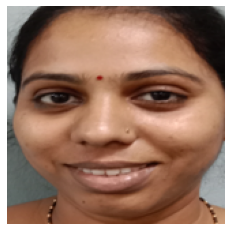

In [ ]:
# Choose a random index
random.seed(100)
selection = random.choice([i for i in range(testX.shape[0])])

face = X_train[selection]

yhat_prob = model.predict_proba(testX[selection].reshape(1,-1))
yhat = model.predict(testX[selection].reshape(1,-1))

celeb = label.inverse_transform(yhat)

plt.imshow(face)
plt.axis('off')

print(f'Probability : {np.max(yhat_prob)*100}, \nEmployee - Predicted : {celeb}, Acutal : {y_train[selection]}')

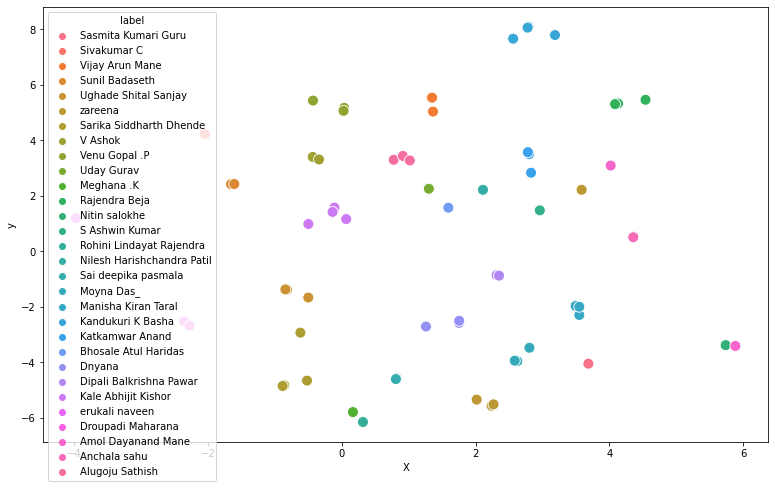

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(learning_rate=100)

tsne_features = tsne.fit_transform(trainX)

X = tsne_features[:,0]
y = tsne_features[:,1]

dataset = pd.DataFrame(data=y_train, columns=['label'])
dataset['X'] = X
dataset['y'] = y

plt.figure(figsize=(13,8))
sns.scatterplot(data=dataset, x='X', y='y', hue='label', s=120)

In [ ]:
# Saving model
import pickle
pickle.dump(model, open('/content/drive/My Drive/model.pkl', 'wb'))

In [ ]:
# # MODEL INFERENCE

# Loading model
import pickle
from keras.models import load_model
model = pickle.load(open('/content/drive/My Drive/model.pkl', 'rb'))
model1 = load_model('/content/drive/My Drive/facenet_keras.h5')

Probability : 96.4464979689627, 
Employee - Predicted : Anchala sahu


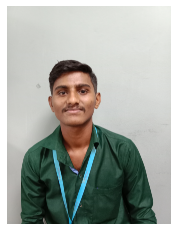

In [ ]:
# INFERENCE
def preprocess_img(file_path):
  inp = extract_face(file_path)  # EXTRACTS FACE FROM IMAGE
  inp_emb = get_embedding(model1, inp) #MAKES EMBEDDING OF THE IMAGE USING PRE-TRAINED MODEL
  img = plt.imread(file_path)      # Displaying image
  plt.axis('off')
  plt.imshow(img)
  return inp_emb.reshape(1,-1)
test_img = preprocess_img('/content/drive/MyDrive/ID Cards/Anchala sahu/IMG_20220324_164251.jpg') # Calling function

yhat_prob = model.predict_proba(test_img)
yhat = model.predict(test_img)

emp = label.inverse_transform(yhat)


print(f'Probability : {np.max(yhat_prob)*100}, \nEmployee - Predicted : {emp[0]}')